In [1]:
import sys
import os
sys.path.append("src/")
from src import *
sys.path.append("scripts/")
from ixnos import iXnos
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from Bio import SeqIO
import seaborn as sns
import random

In [2]:
ansari_n5p4 = iXnos(min_codon=-5, max_codon=4)
ansari_n5p4.load_state_dict(torch.load("processed-data/thp1_v2/models/ixnos_n5p4_full.pth"))
ansari_n5p4.eval() 

ansari_n3p2 = iXnos(min_codon=-3, max_codon=2)
ansari_n3p2.load_state_dict(torch.load("processed-data/thp1_v2/models/ixnos_n3p2_full.pth"))
ansari_n3p2.eval() 

iwasaki_n5p4 = iXnos(min_codon=-5, max_codon=4)
iwasaki_n5p4.load_state_dict(torch.load("models/ixnos_retrained.pth"))
iwasaki_n5p4.eval() 

iwasaki_n3p2 = iXnos(min_codon=-3, max_codon=2)
iwasaki_n3p2.load_state_dict(torch.load("processed-data/iwasaki/models/ixnos_n3p2_full.pth"))
iwasaki_n3p2.eval() 


/tmp/ipykernel_16220/127314133.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ansari_n5p4.load_state_dict(torch.load("processed-data/thp1_v2/models/ixnos_n5p4_full.pth"

iXnos(
  (layers): Sequential(
    (0): Linear(in_features=456, out_features=200, bias=True)
    (1): Tanh()
    (2): Linear(in_features=200, out_features=1, bias=True)
    (3): ReLU()
  )
)

In [9]:
cit_seq = 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLGYGLMCFARYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSYQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'

seqs, speeds_iw = iwasaki_n3p2.predict_random_speeds(cit_seq, 1000)
speeds_as = [ansari_n3p2.predict_elongation(seq) for seq in seqs]

In [37]:
cds = cit_seq

# codons = [random.choice(let2cod[i]) for i in cds]
# nt_seq = "".join(codons)
seqs = np.array(["".join([random.choice(let2cod[i]) for i in cds]) for _ in range(1000)])
np.apply_along_axis(seqs, 0, predict_elongation, model=iwasaki_n3p2)

AxisError: axis 0 is out of bounds for array of dimension 0

In [38]:
n = 10
seqs, speeds_iwasaki = predict_random_speeds(cit_seq, n, iwasaki_n3p2, min_cod=-3, max_cod=2)
speeds_ansari = [predict_elongation(i, ansari_n3p2, -3, 2) for i in seqs]  
# [random.choice(let2cod[i]) for i in cit_seq]

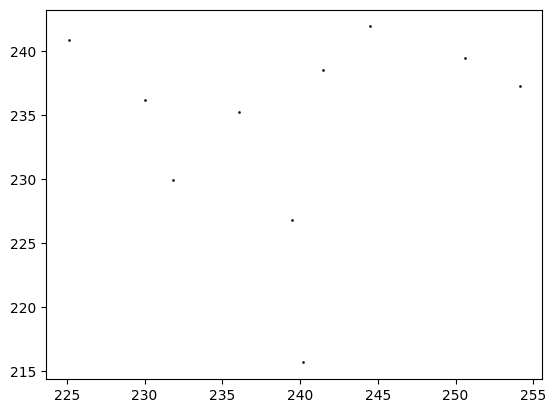

In [39]:
sns.scatterplot(x=speeds_iwasaki, y=speeds_ansari, edgecolor=None, c='k', s=3)
plt.show()

# Evaluation of all models

In [ ]:
"processed-data/thp1_v2/models/ixnos_n5p4_full.pth"

"processed-data/thp1_v2/models/ixnos_n3p2_full.pth"

"models/ixnos_retrained.pth"

"processed-data/iwasaki/models/ixnos_n3p2_full.pth"

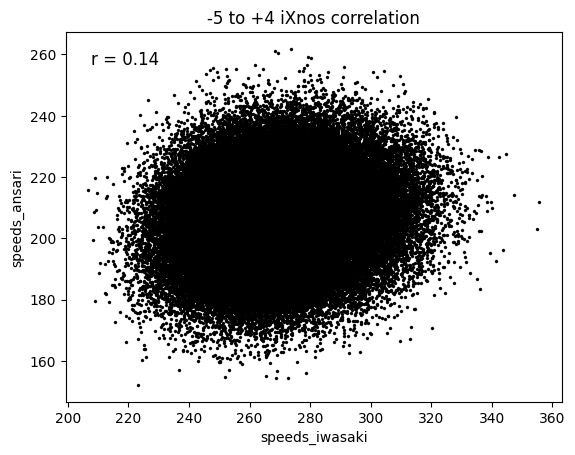

In [60]:
res = pd.read_csv("processed-data/iwasaki_vs_ansari_ecitrine_n5p4.csv")
fig, ax = plt.subplots()
sns.scatterplot(
    res,
    x = "speeds_iwasaki", y = "speeds_ansari", s=5, edgecolor=None, c='k'
)
r = res["speeds_iwasaki"].corr(res["speeds_ansari"], method="pearson")
# ax.legend(title="sequence class", **legend_kwargs())
ax.text(0.05, 0.95, f"r = {r:.2f}", transform=ax.transAxes, 
        fontsize=12, verticalalignment='top', horizontalalignment='left', 
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.65))
ax.set_title("-5 to +4 iXnos correlation")
plt.show()

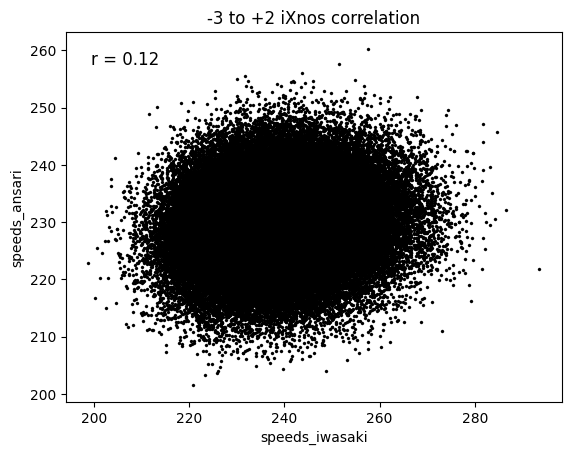

In [63]:
res2 = pd.read_csv("processed-data/iwasaki_vs_ansari_ecitrine_n3p2.csv")
fig, ax = plt.subplots()
sns.scatterplot(
    res2,
    x = "speeds_iwasaki", y = "speeds_ansari", s=5, edgecolor=None, c='k'
)
r = res2["speeds_iwasaki"].corr(res2["speeds_ansari"], method="pearson")
# ax.legend(title="sequence class", **legend_kwargs())
ax.text(0.05, 0.95, f"r = {r:.2f}", transform=ax.transAxes, 
        fontsize=12, verticalalignment='top', horizontalalignment='left', 
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.65))
ax.set_title("-3 to +2 iXnos correlation")
plt.show()

In [75]:
ansari_n3p2
display(res2.iloc[:1000])
# res2.iloc[:10]["seq"].apply(lambda seq: predict_elongation(seq, model=ansari_n3p2, min_cod=-3, max_cod=2), )
res2["speeds_iwasaki"].corr(res2["speeds_ansari"])
res2[["speeds_iwasaki", "speeds_ansari"]].corr()

,seq,speeds_iwasaki,speeds_ansari
0,ATGAGCAAAGGTGAGGAGCTCTTTACCGGCGTAGTACCGATCCTTG...,265.202261,241.232792
1,ATGTCTAAAGGTGAGGAGTTATTCACAGGCGTAGTGCCCATATTAG...,239.571272,235.007811
2,ATGAGTAAAGGCGAGGAACTCTTCACTGGTGTAGTTCCAATTCTCG...,240.427962,235.694765
3,ATGAGCAAGGGAGAAGAGTTATTCACGGGTGTCGTCCCGATCTTGG...,258.137013,232.122823
4,ATGTCCAAGGGAGAGGAACTGTTCACTGGGGTAGTGCCGATTTTGG...,251.600402,232.535076
...,...,...,...
995,ATGTCAAAGGGTGAGGAGTTATTTACGGGGGTTGTGCCAATTCTGG...,225.215785,226.102792
996,ATGTCTAAGGGCGAAGAACTCTTCACGGGTGTGGTTCCGATCTTGG...,234.025097,222.345436
997,ATGTCCAAAGGCGAAGAGTTATTCACGGGCGTGGTCCCCATTCTAG...,252.861581,225.584929
998,ATGTCTAAGGGAGAAGAGTTGTTCACTGGGGTTGTACCAATTTTAG...,240.873158,227.908943


,speeds_iwasaki,speeds_ansari
speeds_iwasaki,1.000000,0.116089
speeds_ansari,0.116089,1.000000


In [118]:
# ansari_n5p4.predict_elongation(res2["seq"][0])
# ansari_n5p4.codon_indices.remove(3)
# ansari_n5p4.codon_indices
l = 0
m = iXnos(leaveout=l)
# [[i, list(range(3 * i,  3 * (i + 1)))] for i in m.codon_indices]
# for i in range(3 * l, 3 * (l + 1)):
#     m.nt_indices.remove(i)

m.nt_indices

[-15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14]